### Cropping

*Last Updated*: 2023-09-01

### Authors
* Hannah Zhang (hannahzhang@ucsb.edu)


### Overview
This Jupyter notebook is intended to demonstrate 

* cropping hand images with mediapipe 


### Key Results

- can detect 20 different major landmarks from a hand image
- can be useful for extracting specific hand features such as knuckles
- mediapipe can completely miss a hand in an image so some data may be lost

In [ ]:
import os
import cv2
import glob
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage import io
from skimage.color import rgb2gray
import imageio
import skimage
from scipy import ndimage
import pandas as pd
import matplotlib as mpl
from skimage import feature
from rembg import remove
from scipy import ndimage as ndi
from skimage.util import img_as_float
from skimage.filters import gabor_kernel
from skimage.filters import gabor
from numpy import asarray
import numpy as np
from PIL import Image, ImageDraw
import mediapipe as mp


In [3]:
def remove_bg(im):  
    image = Image.open(im)
    output = remove(image)
    return np.array(output)
    #output.show()

In [3]:
remove_1 = remove_bg('/Applications/DermaML/image007.jpg')

hand_landmarks: landmark {
  x: 0.4231695
  y: 0.608837
  z: 3.6504585e-07
}
landmark {
  x: 0.39920467
  y: 0.45535597
  z: 0.0064171655
}
landmark {
  x: 0.34813654
  y: 0.35420263
  z: 0.0046023396
}
landmark {
  x: 0.29024166
  y: 0.28992814
  z: 0.004333353
}
landmark {
  x: 0.24335602
  y: 0.25997838
  z: 0.0053713364
}
landmark {
  x: 0.25235876
  y: 0.45531887
  z: -0.016172027
}
landmark {
  x: 0.1482991
  y: 0.423088
  z: -0.010426448
}
landmark {
  x: 0.11185172
  y: 0.4185882
  z: 0.004904006
}
landmark {
  x: 0.10649012
  y: 0.4239862
  z: 0.020214612
}
landmark {
  x: 0.24113926
  y: 0.56519103
  z: -0.015642388
}
landmark {
  x: 0.13023004
  y: 0.5380273
  z: -0.0043957643
}
landmark {
  x: 0.13830823
  y: 0.5187028
  z: 0.019870583
}
landmark {
  x: 0.16265616
  y: 0.5100308
  z: 0.039479315
}
landmark {
  x: 0.24599932
  y: 0.66354257
  z: -0.012001948
}
landmark {
  x: 0.14471817
  y: 0.6371614
  z: -0.002217117
}
landmark {
  x: 0.16062409
  y: 0.61102706
  z: 0.0261

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


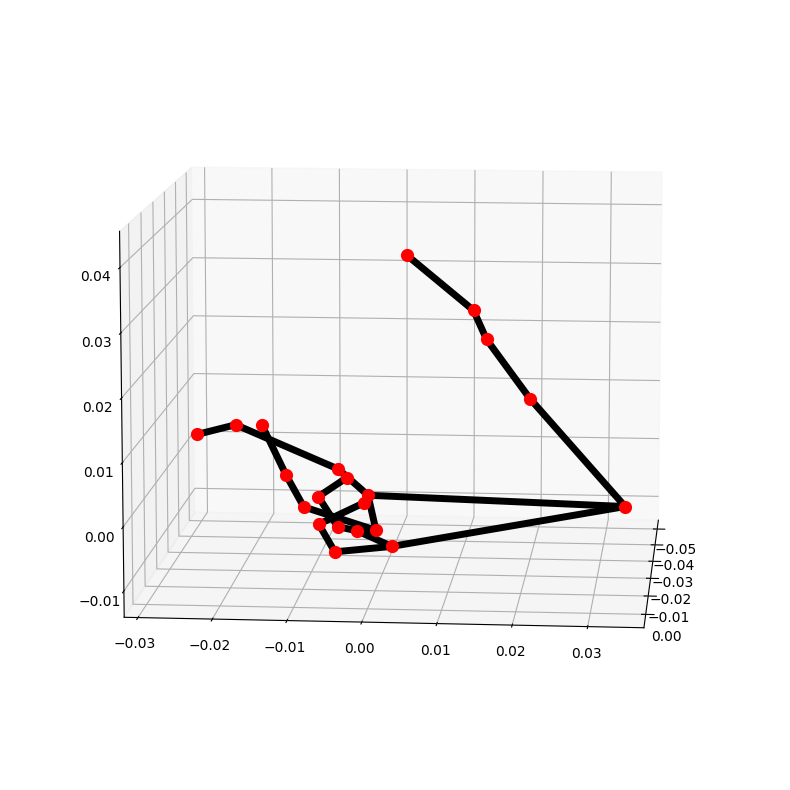

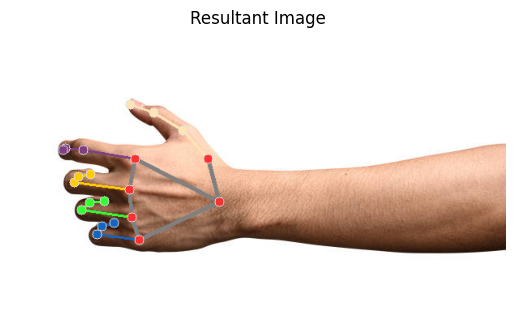

In [4]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# Path to image file
image_file = "/Applications/DermaML/sidewayshand.jpeg"

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:

    # Read the image file
    image = cv2.flip(cv2.imread(image_file), 1)
    
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    if not results.multi_hand_landmarks:
        print("No hands detected in the image.")
    else:
        image_height, image_width, _ = image.shape
        annotated_image = image.copy()
        
        for hand_landmarks in results.multi_hand_landmarks:
            print('hand_landmarks:', hand_landmarks)
        
            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())
        
        cv2.imwrite(
            '/tmp/annotated_image.png', cv2.flip(annotated_image, 1))
        
        # Draw hand landmarks
        if results.multi_hand_world_landmarks:
            for hand_world_landmarks in results.multi_hand_world_landmarks:
                mp_drawing.plot_landmarks(
                    hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

        plt.title("Resultant Image");plt.axis('off');plt.imshow(annotated_image[:,:,::-1]);plt.show()


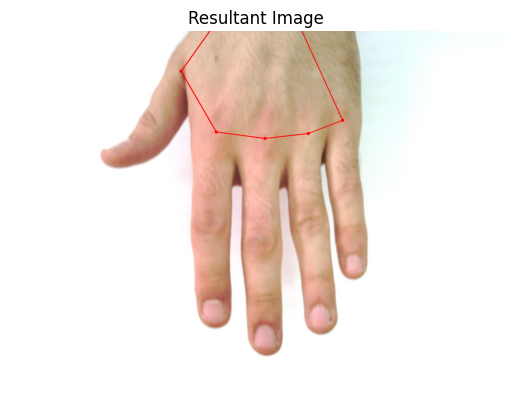

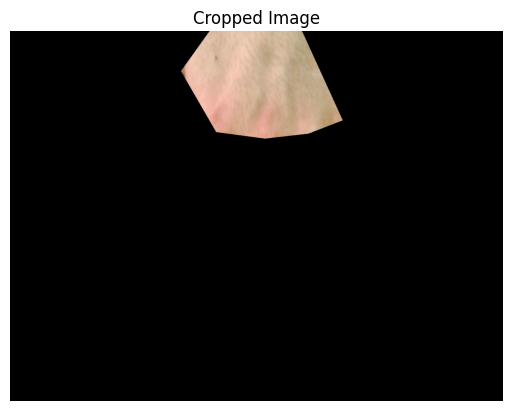

In [5]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# Path to image file
image_file = "/Applications/DermaML/src/dermaml/tests/Hand_0000002.jpg"

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:

    # Read image file
    image = cv2.flip(cv2.imread(image_file), 1)

    # Convert BGR image to RGB
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.multi_hand_landmarks:
        print("No hands detected in the image.")
    else:
        image_height, image_width, _ = image.shape
        annotated_image = image.copy()

        # Get first detected hand
        hand_landmarks = results.multi_hand_landmarks[0]

        landmark_0 = (
            int(hand_landmarks.landmark[0].x * image_width),
            int(hand_landmarks.landmark[0].y * image_height)
        )

        landmark_1 = (
            int(hand_landmarks.landmark[1].x * image_width),
            int(hand_landmarks.landmark[1].y * image_height)
        )

        landmark_2 = (
            int(hand_landmarks.landmark[2].x * image_width),
            int(hand_landmarks.landmark[2].y * image_height)
        )

        landmark_5 = (
            int(hand_landmarks.landmark[5].x * image_width),
            int(hand_landmarks.landmark[5].y * image_height)
        )

        landmark_9 = (
            int(hand_landmarks.landmark[9].x * image_width),
            int(hand_landmarks.landmark[9].y * image_height)
        )

        landmark_13 = (
            int(hand_landmarks.landmark[13].x * image_width),
            int(hand_landmarks.landmark[13].y * image_height)
        )

        landmark_17 = (
            int(hand_landmarks.landmark[17].x * image_width),
            int(hand_landmarks.landmark[17].y * image_height)
        )

        # Draw circles for landmarks
        cv2.circle(annotated_image, landmark_0, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_1, 5, (0, 0, 255), -1)  
        cv2.circle(annotated_image, landmark_2, 5, (0, 0, 255), -1)
        cv2.circle(annotated_image, landmark_5, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_9, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_13, 5, (0, 0, 255), -1)  
        cv2.circle(annotated_image, landmark_17, 5, (0, 0, 255), -1)  

        landmark_coordinates = [landmark_0, landmark_1, landmark_2, landmark_5, landmark_9, landmark_13, landmark_17]

        for i in range(len(landmark_coordinates) - 1):
            cv2.line(annotated_image, landmark_coordinates[i], landmark_coordinates[i + 1], (0, 0, 255), 2)

        # Connect the last landmark to the first landmark to complete the loop
        cv2.line(annotated_image, landmark_coordinates[-1], landmark_coordinates[0], (0, 0, 255), 2)

        # Create a mask of the region within the loop
        mask = np.zeros_like(image)
        cv2.fillPoly(mask, [np.array(landmark_coordinates)], (255, 255, 255))

        # Apply the mask to the original image to crop the region
        cropped_image = cv2.bitwise_and(image, mask)

        plt.title("Resultant Image");plt.axis('off');plt.imshow(annotated_image[:,:,::-1]);plt.show()
        plt.title("Cropped Image");plt.axis('off');plt.imshow(cropped_image[:,:,::-1]);plt.show()



In [108]:
import cv2
import mediapipe as mp

def process_image_with_landmarks(image_path):

    mp_drawing = mp.solutions.drawing_utils
    mp_hands = mp.solutions.hands

    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=1,
        min_detection_confidence=0.5) as hands:

        # Read image file
        image = cv2.flip(cv2.imread(image_file), 1)

        # Convert BGR image to RGB
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.multi_hand_landmarks:
            print("No hands detected in the image.")
        else:
            image_height, image_width, _ = image.shape
            annotated_image = image.copy()

            # Get first detected hand
            hand_landmarks = results.multi_hand_landmarks[0]

            landmark_0 = (
                int(hand_landmarks.landmark[0].x * image_width),
                int(hand_landmarks.landmark[0].y * image_height)
            )

            landmark_1 = (
                int(hand_landmarks.landmark[1].x * image_width),
                int(hand_landmarks.landmark[1].y * image_height)
            )

            landmark_2 = (
                int(hand_landmarks.landmark[2].x * image_width),
                int(hand_landmarks.landmark[2].y * image_height)
            )

            landmark_5 = (
                int(hand_landmarks.landmark[5].x * image_width),
                int(hand_landmarks.landmark[5].y * image_height)
            )

            landmark_9 = (
                int(hand_landmarks.landmark[9].x * image_width),
                int(hand_landmarks.landmark[9].y * image_height)
            )

            landmark_13 = (
                int(hand_landmarks.landmark[13].x * image_width),
                int(hand_landmarks.landmark[13].y * image_height)
            )

            landmark_17 = (
                int(hand_landmarks.landmark[17].x * image_width),
                int(hand_landmarks.landmark[17].y * image_height)
            )

            # Draw circles for landmarks
            cv2.circle(annotated_image, landmark_0, 5, (0, 0, 255), -1) 
            cv2.circle(annotated_image, landmark_1, 5, (0, 0, 255), -1)  
            cv2.circle(annotated_image, landmark_2, 5, (0, 0, 255), -1)
            cv2.circle(annotated_image, landmark_5, 5, (0, 0, 255), -1) 
            cv2.circle(annotated_image, landmark_9, 5, (0, 0, 255), -1) 
            cv2.circle(annotated_image, landmark_13, 5, (0, 0, 255), -1)  
            cv2.circle(annotated_image, landmark_17, 5, (0, 0, 255), -1)  

            landmark_coordinates = [landmark_0, landmark_1, landmark_2, landmark_5, landmark_9, landmark_13, landmark_17]

            for i in range(len(landmark_coordinates) - 1):
                cv2.line(annotated_image, landmark_coordinates[i], landmark_coordinates[i + 1], (0, 0, 255), 2)

            # Connect the last landmark to the first landmark to complete the loop
            cv2.line(annotated_image, landmark_coordinates[-1], landmark_coordinates[0], (0, 0, 255), 2)

            # Create a mask of the region within the loop
            mask = np.zeros_like(image)
            cv2.fillPoly(mask, [np.array(landmark_coordinates)], (255, 255, 255))

            # Apply the mask to the original image to crop the region
            cropped_image = cv2.bitwise_and(image, mask)

            colored_image = cropped_image[:,:,::-1]

            if colored_image.shape[2] == 3:  # If the image is RGB
                resultant_image = cv2.cvtColor(colored_image, cv2.COLOR_RGB2RGBA)

            for i in range(resultant_image.shape[0]):
                for j in range(resultant_image.shape[1]):
                    # Check if pixel is black
                    if all(resultant_image[i, j, :3] == [0, 0, 0]):
                        # Set the alpha channel to 0 to make it transparent
                        resultant_image[i, j, 3] = 0
            
            plt.axis('off');plt.imshow(resultant_image);plt.show()

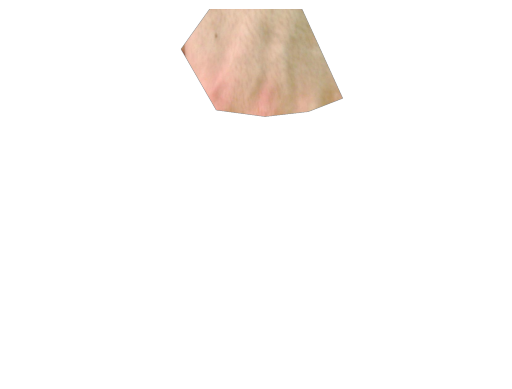

In [109]:
process_image_with_landmarks("/Applications/DermaML/src/dermaml/tests/Hand_0000002.jpg")

In [73]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# image_file = np.array(remove_1)

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:

    # Read the image file
    # image = cv2.flip(cv2.imread(image_file), 1)

    image = np.array(remove_1)
    flipped_image = np.flip(image, axis=1)

    print(flipped_image.shape[2])

    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(flipped_image, cv2.COLOR_BGRA2RGBA))

    if not results.multi_hand_landmarks:
        print("No hands detected in the image.")
    else:
        image_height, image_width, _ = image.shape
        annotated_image = image.copy()

        # Get the first detected hand
        hand_landmarks = results.multi_hand_landmarks[0]

        landmark_0 = (
            int(hand_landmarks.landmark[0].x * image_width),
            int(hand_landmarks.landmark[0].y * image_height)
        )

        landmark_1 = (
            int(hand_landmarks.landmark[1].x * image_width),
            int(hand_landmarks.landmark[1].y * image_height)
        )

        landmark_2 = (
            int(hand_landmarks.landmark[2].x * image_width),
            int(hand_landmarks.landmark[2].y * image_height)
        )

        landmark_5 = (
            int(hand_landmarks.landmark[5].x * image_width),
            int(hand_landmarks.landmark[5].y * image_height)
        )

        landmark_9 = (
            int(hand_landmarks.landmark[9].x * image_width),
            int(hand_landmarks.landmark[9].y * image_height)
        )

        landmark_13 = (
            int(hand_landmarks.landmark[13].x * image_width),
            int(hand_landmarks.landmark[13].y * image_height)
        )

        landmark_17 = (
            int(hand_landmarks.landmark[17].x * image_width),
            int(hand_landmarks.landmark[17].y * image_height)
        )

        # Draw circles for landmark 1 and landmark 2
        cv2.circle(annotated_image, landmark_0, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_1, 5, (0, 0, 255), -1)  
        cv2.circle(annotated_image, landmark_2, 5, (0, 0, 255), -1)
        cv2.circle(annotated_image, landmark_5, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_9, 5, (0, 0, 255), -1) 
        cv2.circle(annotated_image, landmark_13, 5, (0, 0, 255), -1)  
        cv2.circle(annotated_image, landmark_17, 5, (0, 0, 255), -1)  

        landmark_coordinates = [landmark_0, landmark_1, landmark_2, landmark_5, landmark_9, landmark_13, landmark_17]

        for i in range(len(landmark_coordinates) - 1):
            cv2.line(annotated_image, landmark_coordinates[i], landmark_coordinates[i + 1], (0, 0, 255), 2)

        # Connect the last landmark to the first landmark to complete the loop
        cv2.line(annotated_image, landmark_coordinates[-1], landmark_coordinates[0], (0, 0, 255), 2)

        # Create a mask of the region within the loop
        mask = np.zeros_like(image)
        cv2.fillPoly(mask, [np.array(landmark_coordinates)], (255, 255, 255))

        # Apply the mask to the original image to crop the region
        cropped_image = cv2.bitwise_and(image, mask)

        plt.title("Resultant Image");plt.axis('off');plt.imshow(annotated_image[:,:,::-1]);plt.show()
        plt.title("Cropped Image");plt.axis('off');plt.imshow(cropped_image[:,:,::-1]);plt.show()

4
No hands detected in the image.
